In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 80)
pd.set_option("display.width", 160)

## Load all the datsets 

In [2]:
crime = pd.read_csv("Crime_Data.csv")
arrests = pd.read_csv("Arrests.csv")
crime_addresses = pd.read_csv("CrimeAddresses2.csv")
crime_neigh = pd.read_csv("CrimeData_with_Neighborhood_Info.csv")

print("Crime_Data shape:", crime.shape)
print("Arrests shape:", arrests.shape)
print("CrimeAddresses2 shape:", crime_addresses.shape)
print("CrimeData_with_Neighborhood_Info shape:", crime_neigh.shape)

crime.head()

Crime_Data shape: (25512, 9)
Arrests shape: (11359, 12)
CrimeAddresses2 shape: (5137, 7)
CrimeData_with_Neighborhood_Info shape: (228990, 23)


,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Assist Citizen - Mental/TDO/ECO,202500023705,2100.0,"MICHIE DR, 35B",CPD,2025/07/08 21:23:03+00,1723,"Crowley, Raeann"
1,2,Shots Fired/Illegal Hunting,202500023699,600.0,10 1/2 ST NW,CPD,2025/07/08 20:48:27+00,1648,"Curry, Brian"
2,3,Sex Offense - Forcible Sodomy,202500023694,200.0,2ND ST NW,CPD,2025/07/08 20:35:32+00,1635,"O'Briant, Landon"
3,4,Vandalism,202500023691,1100.0,E MARKET ST,CPD,2025/07/08 20:22:29+00,1622,"Benbow, Lauren"
4,5,Larceny - Shoplifitng,202500023686,500.0,W MAIN ST,CPD,2025/07/08 20:12:33+00,1612,"Benbow, Lauren"


## Quick overview 

In [3]:
def quick_overview(df, name="data"):
    print(f"\n================ {name.upper()} =================")
    print("Shape:", df.shape)
    print("\nDtypes:")
    print(df.dtypes)
    print("\nMissing values (count):")
    print(df.isna().sum())
    print("\nMissing values (%)")
    print((df.isna().mean() * 100).round(2))
    print("\nNumeric describe:")
    display(df.select_dtypes(include=np.number).describe().T)
    print("\nCategorical sample value counts:")
    for col in df.select_dtypes(include="object").columns[:5]:
        print(f"\n- {col}")
        display(df[col].value_counts().head(10))

## Overview for each Dataset 

In [4]:
quick_overview(crime, "Crime_Data")
quick_overview(arrests, "Arrests")
quick_overview(crime_addresses, "CrimeAddresses2")
quick_overview(crime_neigh, "CrimeData_with_Neighborhood_Info")



================ CRIME_DATA =================
Shape: (25512, 9)

Dtypes:
RecordID              int64
Offense              object
IncidentID            int64
BlockNumber         float64
StreetName           object
Agency               object
DateReported         object
HourReported          int64
ReportingOfficer     object
dtype: object

Missing values (count):
RecordID               0
Offense                0
IncidentID             0
BlockNumber         1924
StreetName             0
Agency                 0
DateReported           0
HourReported           0
ReportingOfficer      17
dtype: int64

Missing values (%)
RecordID            0.00
Offense             0.00
IncidentID          0.00
BlockNumber         7.54
StreetName          0.00
Agency              0.00
DateReported        0.00
HourReported        0.00
ReportingOfficer    0.07
dtype: float64

Numeric describe:


,count,mean,std,min,25%,50%,75%,max
RecordID,25512.0,1.275650e+04,7.364824e+03,1.000000e+00,6.378750e+03,1.275650e+04,1.913425e+04,2.551200e+04
IncidentID,25512.0,2.022682e+11,1.466151e+08,2.020000e+11,2.021000e+11,2.023000e+11,2.024000e+11,2.025800e+11
BlockNumber,23588.0,8.773614e+02,6.319402e+02,1.000000e+02,4.000000e+02,8.000000e+02,1.300000e+03,6.400000e+03
HourReported,25512.0,1.348301e+03,5.812973e+02,0.000000e+00,1.002000e+03,1.404000e+03,1.803000e+03,2.359000e+03



Categorical sample value counts:

- Offense


Offense
Hit and Run                        2246
Assault Simple                     1985
Suspicious Activity                1673
Vandalism                          1600
Larceny - All Other                1560
Larceny - From Motor Vehicle       1553
Assist Citizen - Mental/TDO/ECO    1448
Lost/FoundProperty                 1186
Larceny - Theft from Building      1095
Larceny - Shoplifitng               780
Name: count, dtype: int64


- StreetName


StreetName
EMMET ST N        1290
W MAIN ST         1126
E MARKET ST       1001
E MAIN ST          541
5TH ST SW          507
PRESTON AVE        369
CHERRY AVE         356
RIDGE ST           286
UNIVERSITY AVE     270
14TH ST NW         237
Name: count, dtype: int64


- Agency


Agency
CPD    25512
Name: count, dtype: int64


- DateReported


DateReported
2024/08/15 23:27:45+00    4
2020/10/11 19:45:25+00    3
2021/06/02 12:26:13+00    3
2022/07/30 00:37:09+00    3
2021/03/11 00:04:46+00    3
2022/02/14 05:56:50+00    3
2025/04/19 05:30:41+00    2
2023/09/22 13:10:15+00    2
2021/06/15 12:44:21+00    2
2023/07/15 18:31:13+00    2
Name: count, dtype: int64


- ReportingOfficer


ReportingOfficer
Moje, Ashley           1598
Miller, Tiffany        1084
Shiflett, Tammy         729
Eckenroth, Rachel       627
Green, Bryan            593
Pendleton, Eric         532
Houchens, Jamell        512
Turner, Devon           455
Vlasis, Christopher     445
Samar, Jack             402
Name: count, dtype: int64


================ ARRESTS =================
Shape: (11359, 12)

Dtypes:
ArrestID                int64
ArrestDatetime         object
FirstName              object
HouseNumber           float64
LastName               object
MiddleName             object
NameSuffix             object
Race                   object
Sex                    object
Statute                object
StatuteDescription     object
Street                 object
dtype: object

Missing values (count):
ArrestID                  0
ArrestDatetime            0
FirstName                 2
HouseNumber            1409
LastName                  0
MiddleName              794
NameSuffix            10344
Race                     13
Sex                       4
Statute                   6
StatuteDescription        6
Street                  155
dtype: int64

Missing values (%)
ArrestID               0.00
ArrestDatetime         0.00
FirstName              0.02
HouseNumber           12.40
LastName               0.00
MiddleName          

,count,mean,std,min,25%,50%,75%,max
ArrestID,11359.0,5680.000000,3279.205188,1.0,2840.5,5680.0,8519.5,11359.0
HouseNumber,9950.0,943.795176,1385.160677,1.0,247.5,700.0,1215.0,24427.0



Categorical sample value counts:

- ArrestDatetime


ArrestDatetime
2025/02/16 21:37:00+00    13
2023/06/12 13:00:00+00    12
2023/01/14 07:30:00+00     9
2025/06/03 00:37:00+00     9
2021/02/08 01:21:00+00     9
2023/05/03 10:55:00+00     9
2022/06/17 23:11:00+00     9
2025/08/07 20:15:00+00     8
2025/06/02 21:25:00+00     8
2021/01/01 13:53:00+00     8
Name: count, dtype: int64


- FirstName


FirstName
MICHAEL        252
WILLIAM        155
ROBERT         150
JAMES          142
DAVID          137
JOHN           132
CHARLES        130
CHRISTOPHER    117
ANTHONY        112
JOSHUA         110
Name: count, dtype: int64


- LastName


LastName
BROWN         188
JONES         176
JOHNSON       173
ANDERSON      131
SCOTT         130
CARTER        122
WILLIAMS      119
TAYLOR        109
HARRIS        103
WASHINGTON     97
Name: count, dtype: int64


- MiddleName


MiddleName
LEE          310
EDWARD       253
MICHAEL      171
WAYNE        164
ALLEN        136
NICOLE       128
LYNN         124
MARIE        118
ALEXANDER    117
ELIZABETH    106
Name: count, dtype: int64


- NameSuffix


NameSuffix
Jr     675
III    117
Sr     114
II      89
IV      18
V        2
Name: count, dtype: int64


================ CRIMEADDRESSES2 =================
Shape: (5137, 7)

Dtypes:
BlockNumber        float64
StreetName          object
helper              object
State               object
City                object
Street_Address      object
Full_St_Address     object
dtype: object

Missing values (count):
BlockNumber        1014
StreetName            0
helper                0
State                 0
City                  0
Street_Address        0
Full_St_Address       0
dtype: int64

Missing values (%)
BlockNumber        19.74
StreetName          0.00
helper              0.00
State               0.00
City                0.00
Street_Address      0.00
Full_St_Address     0.00
dtype: float64

Numeric describe:


,count,mean,std,min,25%,50%,75%,max
BlockNumber,4123.0,950.327431,724.658741,100.0,300.0,800.0,1400.0,6400.0



Categorical sample value counts:

- StreetName


StreetName
E MARKET ST           19
AVON ST               17
JEFFERSON PARK AVE    17
EMMET ST N            16
RUGBY RD              16
CHERRY AVE            15
E HIGH ST             15
W MAIN ST             14
MONTICELLO RD         14
E JEFFERSON ST        13
Name: count, dtype: int64


- helper


helper
keep            4101
drop             840
intersection     196
Name: count, dtype: int64


- State


State
Virginia    5137
Name: count, dtype: int64


- City


City
Charlottesville    5137
Name: count, dtype: int64


- Street_Address


Street_Address
2100 MICHIE DR             96
800 W MAIN ST              73
300 15TH ST NW             68
1300 CARLTON AVE           61
1000 WERTLAND ST           47
1800 JEFFERSON PARK AVE    47
1600 EMMET ST N            44
1200 CEDARS CT             39
1200 WERTLAND ST           37
1500 CARLTON AVE           36
Name: count, dtype: int64


================ CRIMEDATA_WITH_NEIGHBORHOOD_INFO =================
Shape: (228990, 23)

Dtypes:
fid                             int64
address                        object
index                           int64
lower_geo_                     object
geo_addres                     object
PD_Text_Ad                     object
RecordID                        int64
Offense                        object
IncidentID                      int64
BlockNumbe                    float64
StreetName                     object
Agency                         object
DateReport                     object
HourReport                      int64
ReportingO                     object
BlockNum_S                    float64
Street_Add                     object
NeighborhoodInfoOBJECTID      float64
NeighborhoodInfoBEAT_NO       float64
NeighborhoodInfoNAME           object
NeighborhoodInfoPOPULATION    float64
NeighborhoodInfoDISTRICT      float64
NeighborhoodInfoGlobalID       object
dtype: object

Missing value

,count,mean,std,min,25%,50%,75%,max
fid,228990.0,1.144955e+05,6.610386e+04,1.000000e+00,5.724825e+04,1.144955e+05,1.717428e+05,2.289900e+05
index,228990.0,2.521161e+02,4.270633e+02,0.000000e+00,3.100000e+01,9.800000e+01,2.920000e+02,5.127000e+03
RecordID,228990.0,1.256990e+04,7.313665e+03,1.000000e+00,6.207000e+03,1.244700e+04,1.890175e+04,2.551200e+04
IncidentID,228990.0,2.022724e+11,1.452691e+08,2.020000e+11,2.021800e+11,2.023000e+11,2.024000e+11,2.025800e+11
BlockNumbe,227067.0,1.111455e+03,6.618451e+02,1.000000e+02,6.000000e+02,1.100000e+03,1.600000e+03,4.000000e+03
HourReport,228990.0,1.357035e+03,5.802982e+02,0.000000e+00,1.010000e+03,1.416000e+03,1.809000e+03,2.359000e+03
BlockNum_S,227067.0,1.111455e+03,6.618451e+02,1.000000e+02,6.000000e+02,1.100000e+03,1.600000e+03,4.000000e+03
NeighborhoodInfoOBJECTID,227216.0,1.504061e+01,9.470688e+00,1.000000e+00,8.000000e+00,1.700000e+01,2.200000e+01,3.300000e+01
NeighborhoodInfoBEAT_NO,227216.0,1.499504e+01,1.056962e+01,1.000000e+00,4.000000e+00,1.200000e+01,2.500000e+01,3.300000e+01
NeighborhoodInfoPOPULATION,227216.0,1.796180e+03,1.644016e+03,0.000000e+00,4.880000e+02,1.333000e+03,3.504000e+03,5.081000e+03



Categorical sample value counts:

- address


address
2100 Michie Dr, Charlottesville, Virginia, 22901             23616
800 W Main St, Charlottesville, Virginia, 22903              23532
1300 Carlton Ave, Charlottesville, Virginia, 22902           16191
1600 Emmet St N, Charlottesville, Virginia, 22901            10672
300 15th St NW, Charlottesville, Virginia, 22903             10626
1100 5th St SW, Charlottesville, Virginia, 22902              6585
800 Hardy Dr, Charlottesville, Virginia, 22903                5320
1000 Wertland St, Charlottesville, Virginia, 22903            5088
1800 Jefferson Park Ave, Charlottesville, Virginia, 22903     4750
1900 Emmet St N, Charlottesville, Virginia, 22901             4641
Name: count, dtype: int64


- lower_geo_


lower_geo_
2100 Michie Dr, Charlottesville, Virginia, 22901             23616
800 W Main St, Charlottesville, Virginia, 22903              23532
1300 Carlton Ave, Charlottesville, Virginia, 22902           16191
1600 Emmet St N, Charlottesville, Virginia, 22901            10672
300 15th St NW, Charlottesville, Virginia, 22903             10626
1100 5th St SW, Charlottesville, Virginia, 22902              6585
800 Hardy Dr, Charlottesville, Virginia, 22903                5320
1000 Wertland St, Charlottesville, Virginia, 22903            5088
1800 Jefferson Park Ave, Charlottesville, Virginia, 22903     4750
1900 Emmet St N, Charlottesville, Virginia, 22901             4641
Name: count, dtype: int64


- geo_addres


geo_addres
2100 MICHIE DR, CHARLOTTESVILLE, VA             23616
800 W MAIN ST, CHARLOTTESVILLE, VA              23532
1300 CARLTON AVE, CHARLOTTESVILLE, VA           16191
1600 EMMET ST N, CHARLOTTESVILLE, VA            10672
300 15TH ST NW, CHARLOTTESVILLE, VA             10626
1100 5TH ST SW, CHARLOTTESVILLE, VA              6585
800 HARDY DR, CHARLOTTESVILLE, VA                5320
1000 WERTLAND ST, CHARLOTTESVILLE, VA            5088
1800 JEFFERSON PARK AVE, CHARLOTTESVILLE, VA     4750
1900 EMMET ST N, CHARLOTTESVILLE, VA             4641
Name: count, dtype: int64


- PD_Text_Ad


PD_Text_Ad
2100 MICHIE DR             23616
800 W MAIN ST              23532
1300 CARLTON AVE           16191
300 15TH ST NW             10780
1600 EMMET ST N            10672
1100 5TH ST SW              6585
800 HARDY DR                5320
1000 WERTLAND ST            5088
1800 JEFFERSON PARK AVE     4750
1900 EMMET ST N             4641
Name: count, dtype: int64


- Offense


Offense
Assault Simple                     20552
Larceny - From Motor Vehicle       16541
Larceny - All Other                16539
Assist Citizen - Mental/TDO/ECO    16064
Hit and Run                        15004
Vandalism                          14756
Larceny - Theft from Building      14030
Suspicious Activity                13545
Lost/FoundProperty                  7960
Motor Vehicle Theft                 7395
Name: count, dtype: int64

## EDA on Crime_Data.csv

In [5]:
crime.columns = crime.columns.str.strip().str.replace(" ", "_")

print(crime.columns)

# Try to identify important columns by name
offense_col = None
for cand in ["Offense", "offense", "Offense_cat", "OffenseCategory", "Offense_cat"]:
    if cand in crime.columns:
        offense_col = cand
        break

date_col = None
for cand in ["DateReported", "ReportDate", "Report_Date", "datereported", "date"]:
    if cand in crime.columns:
        date_col = cand
        break

block_col = "BlockNumber" if "BlockNumber" in crime.columns else None
street_col = "StreetName" if "StreetName" in crime.columns else None

offense_col, date_col, block_col, street_col


Index(['RecordID', 'Offense', 'IncidentID', 'BlockNumber', 'StreetName', 'Agency', 'DateReported', 'HourReported', 'ReportingOfficer'], dtype='object')


('Offense', 'DateReported', 'BlockNumber', 'StreetName')

## Offense Frequency 

Using offense column: Offense
offense_counts columns: Index(['Offense', 'count'], dtype='object')


,Offense,count
0,Hit and Run,2246
1,Assault Simple,1985
2,Suspicious Activity,1673
3,Vandalism,1600
4,Larceny - All Other,1560
5,Larceny - From Motor Vehicle,1553
6,Assist Citizen - Mental/TDO/ECO,1448
7,Lost/FoundProperty,1186
8,Larceny - Theft from Building,1095
9,Larceny - Shoplifitng,780


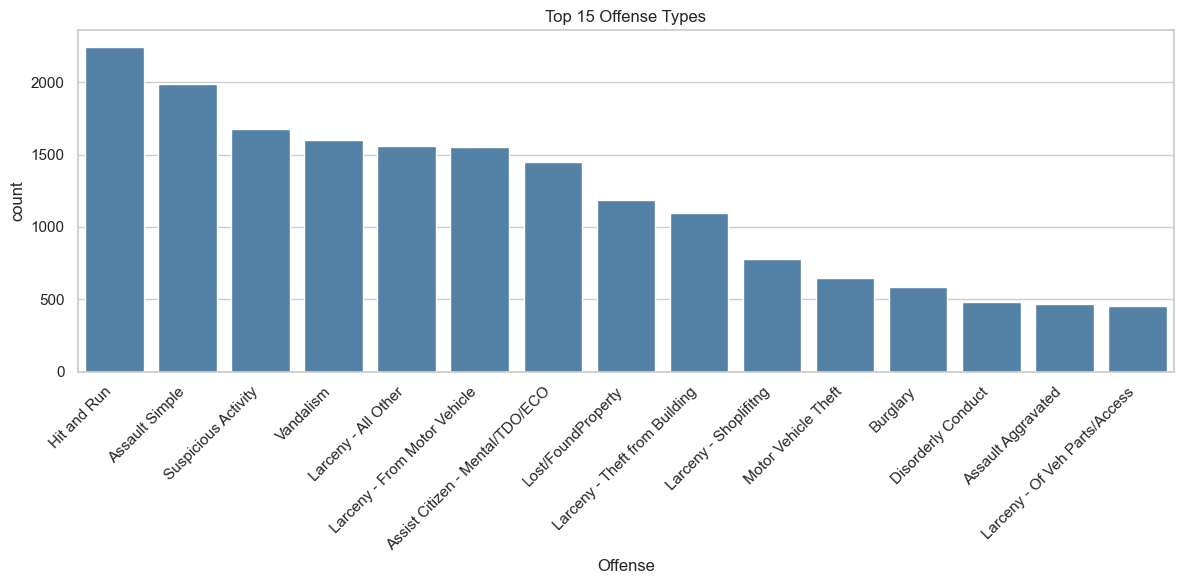

In [13]:
offense_col = "Offense"   
print("Using offense column:", offense_col)

if offense_col not in crime.columns:
    print("Column", offense_col, "is not in crime.columns")
else:
    #  Built a clean frequency table
    offense_counts = crime[offense_col].value_counts(dropna=False).reset_index()

    # After this line, offense_counts has two columns: "index" and offense_col.
    # Renamed them explicitly so we know exactly what they are.
    offense_counts.columns = [offense_col, "count"]

    print("offense_counts columns:", offense_counts.columns)
    display(offense_counts.head(20))

    # Bar chart of top 15 offenses
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=offense_counts.head(15),
        x=offense_col,
        y="count",
        color="steelblue"
    )

    plt.xticks(rotation=45, ha="right")
    plt.title("Top 15 Offense Types")
    plt.tight_layout()
    plt.show()




## Time Based Patterns 

/var/folders/wr/20t16jh508j6qskd9r2rgmlr0000gq/T/ipykernel_78844/1918837112.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crime["month"] = crime[date_col].dt.to_period("M").astype(str)


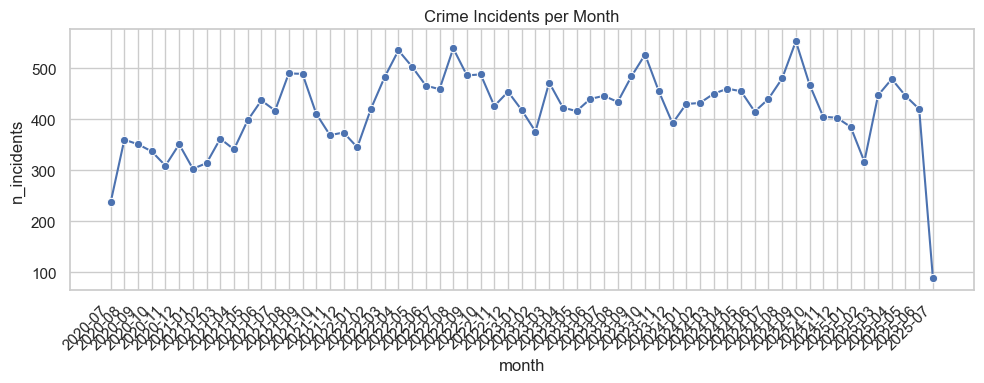

dow_counts columns: Index(['dow', 'n_incidents'], dtype='object')


,dow,n_incidents
0,Monday,3906
1,Tuesday,3753
2,Wednesday,3692
3,Thursday,3612
4,Friday,3826
5,Saturday,3426
6,Sunday,3297


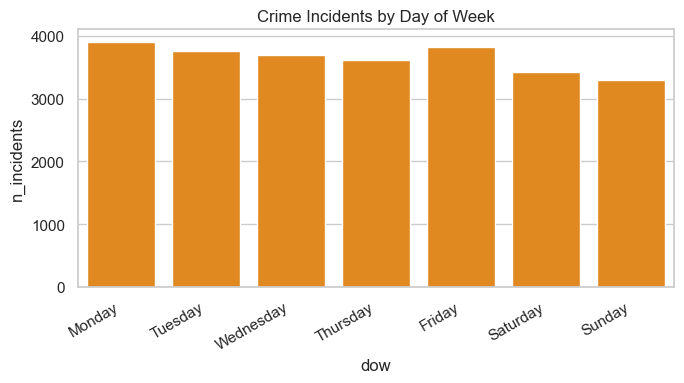

In [15]:
date_col = "DateReported"  

if date_col in crime.columns:
    crime[date_col] = pd.to_datetime(crime[date_col], errors="coerce")

    # Year / month / day-of-week
    crime["year"] = crime[date_col].dt.year
    crime["month"] = crime[date_col].dt.to_period("M").astype(str)
    crime["dow"] = crime[date_col].dt.day_name()
    
    # Crimes per month (line plot)
    monthly_counts = (
        crime
        .groupby("month")
        .size()
        .reset_index(name="n_incidents")
        .sort_values("month")
    )

    plt.figure(figsize=(10, 4))
    sns.lineplot(
        data=monthly_counts,
        x="month",
        y="n_incidents",
        marker="o"
    )
    plt.xticks(rotation=45, ha="right")
    plt.title("Crime Incidents per Month")
    plt.tight_layout()
    plt.show()


    # Crimes by day of week (bar plot)
  
    dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    dow_counts = crime["dow"].value_counts().reindex(dow_order).reset_index()
    dow_counts.columns = ["dow", "n_incidents"]

    print("dow_counts columns:", dow_counts.columns)
    display(dow_counts)

    plt.figure(figsize=(7, 4))
    sns.barplot(
        data=dow_counts,
        x="dow",
        y="n_incidents",
        color="darkorange"
    )
    plt.xticks(rotation=30, ha="right")
    plt.title("Crime Incidents by Day of Week")
    plt.tight_layout()
    plt.show()
else:
    print("Date column", date_col, "not found in crime DataFrame.")


## Numeric Distribution & Correlation(Crime_Data)

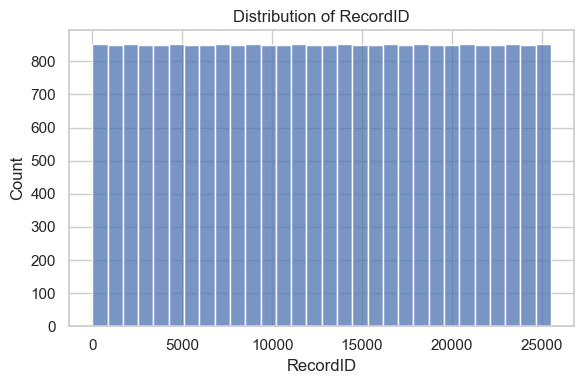

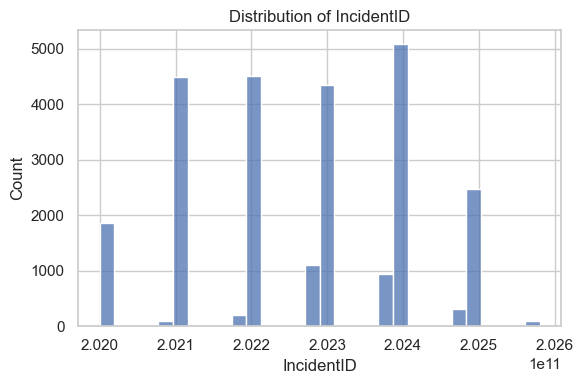

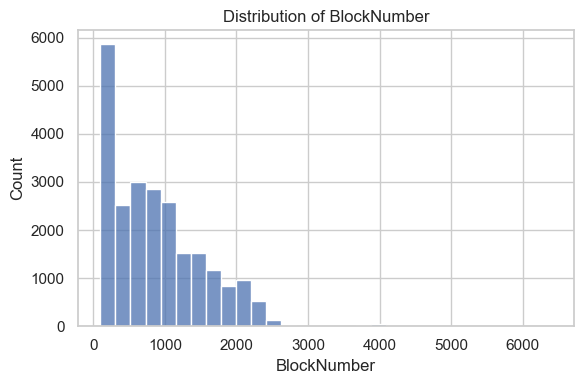

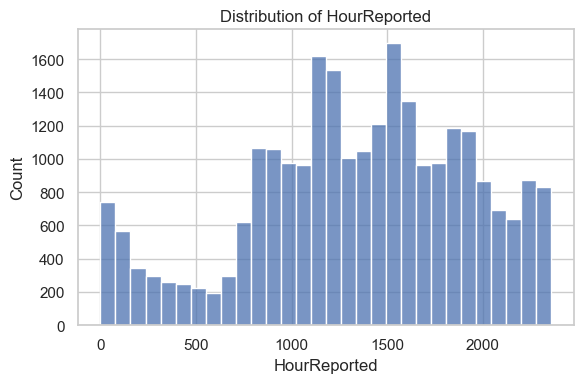

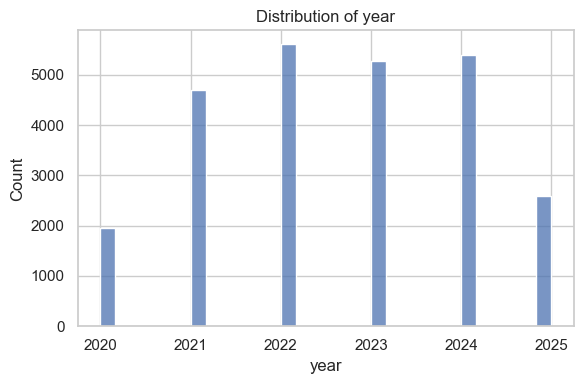

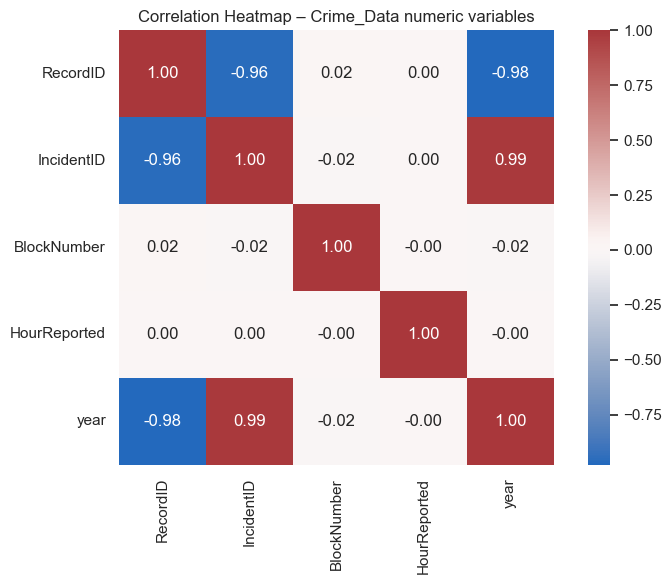

In [16]:
crime_num = crime.select_dtypes(include=np.number)

# Histograms
for col in crime_num.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(crime_num[col], kde=False, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# Correlation heatmap
if crime_num.shape[1] > 1:
    plt.figure(figsize=(8, 6))
    corr = crime_num.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", square=True)
    plt.title("Correlation Heatmap – Crime_Data numeric variables")
    plt.tight_layout()
    plt.show()


## EDA on Arrests.csv

### Arrest Demographics and Charges 

In [17]:
arrests.columns = arrests.columns.str.strip().str.replace(" ", "_")
print(arrests.columns)

# Guess likely demographics
age_col = next((c for c in ["Age","age","SuspectAge"] if c in arrests.columns), None)
race_col = next((c for c in ["Race","race","Ethnicity","ethnicity"] if c in arrests.columns), None)
sex_col  = next((c for c in ["Sex","sex","Gender","gender"] if c in arrests.columns), None)
charge_col = next((c for c in ["Charge","Offense","offense","ChargeDescription"] if c in arrests.columns), None)

age_col, race_col, sex_col, charge_col


Index(['ArrestID', 'ArrestDatetime', 'FirstName', 'HouseNumber', 'LastName', 'MiddleName', 'NameSuffix', 'Race', 'Sex', 'Statute', 'StatuteDescription',
       'Street'],
      dtype='object')


(None, 'Race', 'Sex', None)

## Age Distribution

In [ ]:
if age_col is not None:
    plt.figure(figsize=(6, 4))
    sns.histplot(arrests[age_col].dropna(), bins=25, kde=False)
    plt.title("Distribution of Age – Arrestees")
    plt.xlabel("Age")
    plt.tight_layout()
    plt.show()

## Arrests by Race & Sex

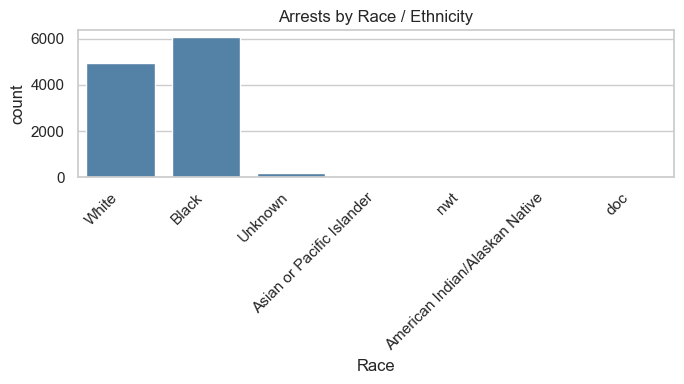

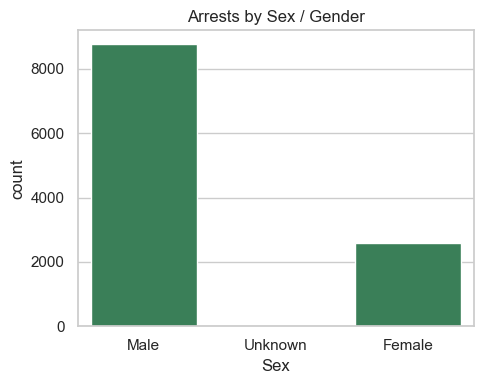

In [20]:
if race_col is not None:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=arrests, x=race_col, color="steelblue")
    plt.xticks(rotation=45, ha="right")
    plt.title("Arrests by Race / Ethnicity")
    plt.tight_layout()
    plt.show()

if sex_col is not None:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=arrests, x=sex_col, color="seagreen")
    plt.title("Arrests by Sex / Gender")
    plt.tight_layout()
    plt.show()


## Top Charges 

In [21]:
if charge_col is not None:
    charge_counts = (
        arrests[charge_col]
        .value_counts()
        .reset_index()
        .rename(columns={"index": charge_col, charge_col: "count"})
    )
    display(charge_counts.head(15))

    plt.figure(figsize=(9, 4))
    sns.barplot(
        data=charge_counts.head(15),
        x=charge_col,
        y="count",
        color="indianred"
    )
    plt.xticks(rotation=45, ha="right")
    plt.title("Top 15 Charges (Arrests)")
    plt.tight_layout()
    plt.show()


## EDA on CrimeData_with_Neighborhood_Info.csv

In [22]:
crime_neigh.columns = crime_neigh.columns.str.strip().str.replace(" ", "_")
print(crime_neigh.columns)

quick_overview(crime_neigh, "CrimeData_with_Neighborhood_Info")


Index(['fid', 'address', 'index', 'lower_geo_', 'geo_addres', 'PD_Text_Ad', 'RecordID', 'Offense', 'IncidentID', 'BlockNumbe', 'StreetName', 'Agency',
       'DateReport', 'HourReport', 'ReportingO', 'BlockNum_S', 'Street_Add', 'NeighborhoodInfoOBJECTID', 'NeighborhoodInfoBEAT_NO', 'NeighborhoodInfoNAME',
       'NeighborhoodInfoPOPULATION', 'NeighborhoodInfoDISTRICT', 'NeighborhoodInfoGlobalID'],
      dtype='object')

================ CRIMEDATA_WITH_NEIGHBORHOOD_INFO =================
Shape: (228990, 23)

Dtypes:
fid                             int64
address                        object
index                           int64
lower_geo_                     object
geo_addres                     object
PD_Text_Ad                     object
RecordID                        int64
Offense                        object
IncidentID                      int64
BlockNumbe                    float64
StreetName                     object
Agency                         object
DateReport             

,count,mean,std,min,25%,50%,75%,max
fid,228990.0,1.144955e+05,6.610386e+04,1.000000e+00,5.724825e+04,1.144955e+05,1.717428e+05,2.289900e+05
index,228990.0,2.521161e+02,4.270633e+02,0.000000e+00,3.100000e+01,9.800000e+01,2.920000e+02,5.127000e+03
RecordID,228990.0,1.256990e+04,7.313665e+03,1.000000e+00,6.207000e+03,1.244700e+04,1.890175e+04,2.551200e+04
IncidentID,228990.0,2.022724e+11,1.452691e+08,2.020000e+11,2.021800e+11,2.023000e+11,2.024000e+11,2.025800e+11
BlockNumbe,227067.0,1.111455e+03,6.618451e+02,1.000000e+02,6.000000e+02,1.100000e+03,1.600000e+03,4.000000e+03
HourReport,228990.0,1.357035e+03,5.802982e+02,0.000000e+00,1.010000e+03,1.416000e+03,1.809000e+03,2.359000e+03
BlockNum_S,227067.0,1.111455e+03,6.618451e+02,1.000000e+02,6.000000e+02,1.100000e+03,1.600000e+03,4.000000e+03
NeighborhoodInfoOBJECTID,227216.0,1.504061e+01,9.470688e+00,1.000000e+00,8.000000e+00,1.700000e+01,2.200000e+01,3.300000e+01
NeighborhoodInfoBEAT_NO,227216.0,1.499504e+01,1.056962e+01,1.000000e+00,4.000000e+00,1.200000e+01,2.500000e+01,3.300000e+01
NeighborhoodInfoPOPULATION,227216.0,1.796180e+03,1.644016e+03,0.000000e+00,4.880000e+02,1.333000e+03,3.504000e+03,5.081000e+03



Categorical sample value counts:

- address


address
2100 Michie Dr, Charlottesville, Virginia, 22901             23616
800 W Main St, Charlottesville, Virginia, 22903              23532
1300 Carlton Ave, Charlottesville, Virginia, 22902           16191
1600 Emmet St N, Charlottesville, Virginia, 22901            10672
300 15th St NW, Charlottesville, Virginia, 22903             10626
1100 5th St SW, Charlottesville, Virginia, 22902              6585
800 Hardy Dr, Charlottesville, Virginia, 22903                5320
1000 Wertland St, Charlottesville, Virginia, 22903            5088
1800 Jefferson Park Ave, Charlottesville, Virginia, 22903     4750
1900 Emmet St N, Charlottesville, Virginia, 22901             4641
Name: count, dtype: int64


- lower_geo_


lower_geo_
2100 Michie Dr, Charlottesville, Virginia, 22901             23616
800 W Main St, Charlottesville, Virginia, 22903              23532
1300 Carlton Ave, Charlottesville, Virginia, 22902           16191
1600 Emmet St N, Charlottesville, Virginia, 22901            10672
300 15th St NW, Charlottesville, Virginia, 22903             10626
1100 5th St SW, Charlottesville, Virginia, 22902              6585
800 Hardy Dr, Charlottesville, Virginia, 22903                5320
1000 Wertland St, Charlottesville, Virginia, 22903            5088
1800 Jefferson Park Ave, Charlottesville, Virginia, 22903     4750
1900 Emmet St N, Charlottesville, Virginia, 22901             4641
Name: count, dtype: int64


- geo_addres


geo_addres
2100 MICHIE DR, CHARLOTTESVILLE, VA             23616
800 W MAIN ST, CHARLOTTESVILLE, VA              23532
1300 CARLTON AVE, CHARLOTTESVILLE, VA           16191
1600 EMMET ST N, CHARLOTTESVILLE, VA            10672
300 15TH ST NW, CHARLOTTESVILLE, VA             10626
1100 5TH ST SW, CHARLOTTESVILLE, VA              6585
800 HARDY DR, CHARLOTTESVILLE, VA                5320
1000 WERTLAND ST, CHARLOTTESVILLE, VA            5088
1800 JEFFERSON PARK AVE, CHARLOTTESVILLE, VA     4750
1900 EMMET ST N, CHARLOTTESVILLE, VA             4641
Name: count, dtype: int64


- PD_Text_Ad


PD_Text_Ad
2100 MICHIE DR             23616
800 W MAIN ST              23532
1300 CARLTON AVE           16191
300 15TH ST NW             10780
1600 EMMET ST N            10672
1100 5TH ST SW              6585
800 HARDY DR                5320
1000 WERTLAND ST            5088
1800 JEFFERSON PARK AVE     4750
1900 EMMET ST N             4641
Name: count, dtype: int64


- Offense


Offense
Assault Simple                     20552
Larceny - From Motor Vehicle       16541
Larceny - All Other                16539
Assist Citizen - Mental/TDO/ECO    16064
Hit and Run                        15004
Vandalism                          14756
Larceny - Theft from Building      14030
Suspicious Activity                13545
Lost/FoundProperty                  7960
Motor Vehicle Theft                 7395
Name: count, dtype: int64

## Identify Key Columns


Final settings:
neigh_col = None
offense_neigh_col = Offense
dt_neigh_col = None


## Neighborhood-level counts 

Neighborhood column not found. Available columns are:
['fid', 'address', 'index', 'lower_geo_', 'geo_addres', 'PD_Text_Ad', 'RecordID', 'Offense', 'IncidentID', 'BlockNumbe', 'StreetName', 'Agency', 'DateReport', 'HourReport', 'ReportingO', 'BlockNum_S', 'Street_Add', 'NeighborhoodInfoOBJECTID', 'NeighborhoodInfoBEAT_NO', 'NeighborhoodInfoNAME', 'NeighborhoodInfoPOPULATION', 'NeighborhoodInfoDISTRICT', 'NeighborhoodInfoGlobalID']


## Crime Distribution Within Neighborhoods 

Neighborhood or offense column not set correctly.
neigh_col = None offense_neigh_col = Offense
Available columns: ['fid', 'address', 'index', 'lower_geo_', 'geo_addres', 'PD_Text_Ad', 'RecordID', 'Offense', 'IncidentID', 'BlockNumbe', 'StreetName', 'Agency', 'DateReport', 'HourReport', 'ReportingO', 'BlockNum_S', 'Street_Add', 'NeighborhoodInfoOBJECTID', 'NeighborhoodInfoBEAT_NO', 'NeighborhoodInfoNAME', 'NeighborhoodInfoPOPULATION', 'NeighborhoodInfoDISTRICT', 'NeighborhoodInfoGlobalID']


## Time Patterns by Neighborhood 

Neighborhood or offense column not set correctly.
neigh_col = None offense_neigh_col = Offense
Available columns: ['fid', 'address', 'index', 'lower_geo_', 'geo_addres', 'PD_Text_Ad', 'RecordID', 'Offense', 'IncidentID', 'BlockNumbe', 'StreetName', 'Agency', 'DateReport', 'HourReport', 'ReportingO', 'BlockNum_S', 'Street_Add', 'NeighborhoodInfoOBJECTID', 'NeighborhoodInfoBEAT_NO', 'NeighborhoodInfoNAME', 'NeighborhoodInfoPOPULATION', 'NeighborhoodInfoDISTRICT', 'NeighborhoodInfoGlobalID']


## Correlation Heatmap 

## Summary Table (could add in for slides)